# Анализ характеристик и стоимости квартир.
Источник данных: выгрузка из test.csv.

*Данные: [Список квартир с размерами помещений](https://github.com/Valery2120/Flat/blob/main/jupyter/test.csv).*


***

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## 1. Загрузка и анализ данных.

In [2]:
flats = pd.read_csv('test.csv', sep=';', 
                    decimal=',', dtype={'Дом ' :np.str_, 'Квартира' :np.str_}, encoding='cp1251')
flats

,Улица,Дом,Квартира,Помещение,Ширина,Длина,Высота
0,Советвская,1,42,Комната,3.0,3.6,2.50
1,Советвская,1,42,Комната,2.9,3.9,2.50
2,Советвская,1,42,Кухня,2.3,1.5,2.50
3,Советвская,1,42,Туалет,1.0,1.8,2.50
4,Советвская,1,42,Ванна,2.1,1.3,2.50
5,Билецкого,45,35,Комната,3.7,2.1,2.60
6,Билецкого,45,35,Кухня,2.2,1.7,2.60
7,Билецкого,45,35,Туалет,1.1,1.7,2.60
8,Билецкого,45,35,Ванна,2.3,1.7,2.60
9,Артема,63,3,Комната,4.0,3.0,2.55


In [3]:
flats.columns = [column.strip() for column in flats.columns]

In [4]:
flats['Адрес'] = flats['Улица'] + ' ' + flats['Дом'] + '-' + flats['Квартира']
flats['Площадь, кв.м.'] = flats['Ширина'] * flats['Длина']
flats['Объем, куб.м.'] = flats['Площадь, кв.м.'] * flats['Высота']
flats['Стоимость, $'] = flats['Площадь, кв.м.'] * 600

Определяем количество комнат в квартирах и группируем исходные данные по адресам.

In [5]:
amount_room = [line for line in flats.groupby('Помещение')['Адрес'].value_counts()['Комната']]

In [6]:
#Формируем словарь в котором значение - количество комната, а ключ - количество квартир с таким количеством комнат.
amount_room_per_flat = {i : amount_room.count(i) for i in range(1, 4)}

In [7]:
flats_info = flats[['Адрес', 'Площадь, кв.м.', 'Объем, куб.м.', 'Стоимость, $']].groupby(['Адрес']).sum()

##### Сводные данные с характеристиками по каждой квартире  

In [8]:
flats_info = flats_info.reset_index()
flats_info

,Адрес,"Площадь, кв.м.","Объем, куб.м.","Стоимость, $"
0,Артема 63-3,43.05,109.7775,25830.0
1,Билецкого 45-35,17.29,44.9540,10374.0
2,Кожара 32-54,29.21,74.4855,17526.0
3,Крайняя 82-5,58.65,152.4900,35190.0
4,Полесская 74-9,42.45,112.4925,25470.0
5,Советвская 1-42,30.09,75.2250,18054.0


##### Распределение квартир по их характеристикам 

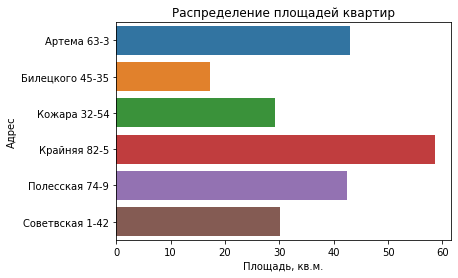

In [9]:
sns.barplot(x='Площадь, кв.м.', y='Адрес', data=flats_info)
plt.title('Распределение площадей квартир')
plt.show()

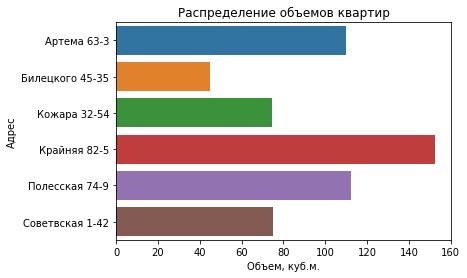

In [10]:
sns.barplot(x=flats_info['Объем, куб.м.'], y=flats_info['Адрес'])
plt.title('Распределение объемов квартир')
plt.show()

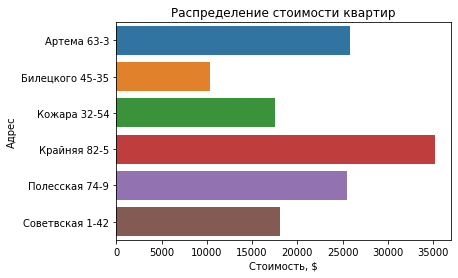

In [11]:
sns.barplot(x=flats_info['Стоимость, $'], y=flats_info['Адрес'])
plt.title('Распределение стоимости квартир')
plt.show()

## 2. Результирующие данные и выводы.

In [12]:
data = {'Запрашиваемые данные':
        [
            'Количество квартир:',
            'Количество 1-комнатных квартир:',
            'Количество 2-комнатных квартир:',
            'Количество 3-комнатных квартир:',
            'Квартира с наименьшей комнатой по площади:',
            'Квартира с наибольшей комнатой по площади:',
            'Квартира с наименьшей ванной по объему:',
            'Квартира с наибольшей ванной по объему:'],
        'Значение':
            [len(flats["Адрес"].unique()),
             amount_room_per_flat[1],
             amount_room_per_flat[2],
             amount_room_per_flat[3],
             flats['Адрес'].iloc[flats['Площадь, кв.м.'][flats['Помещение'] == 'Комната'].idxmin()],
             flats['Адрес'].iloc[flats['Площадь, кв.м.'][flats['Помещение'] == 'Комната'].idxmax()],
             flats['Адрес'].iloc[flats['Объем, куб.м.'][flats['Помещение'] == 'Ванна'].idxmin()],
             flats['Адрес'].iloc[flats['Объем, куб.м.'][flats['Помещение'] == 'Ванна'].idxmax()]]}

In [13]:
flats_data = pd.DataFrame(data)
flats_data

,Запрашиваемые данные,Значение
0,Количество квартир:,6
1,Количество 1-комнатных квартир:,2
2,Количество 2-комнатных квартир:,3
3,Количество 3-комнатных квартир:,1
4,Квартира с наименьшей комнатой по площади:,Билецкого 45-35
5,Квартира с наибольшей комнатой по площади:,Крайняя 82-5
6,Квартира с наименьшей ванной по объему:,Советвская 1-42
7,Квартира с наибольшей ванной по объему:,Полесская 74-9


In [14]:
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')
flats_info.to_excel(writer, sheet_name='Calculations', index=False)
flats_data.to_excel(writer, sheet_name='Analysis', index=False)
writer.save()

### Работа по анализу характеристик квартир состояла из следующих этапов:

1. Загрузка данных.
2. Определение общего количества квартир в списке и количества 1, 2, 3-комнатных квартир.
3. Вычисление площадей и объемов квартир.
4. Определение квартиры с наименьшей и наибольшей комнатой по площади.
5. Определение квартиры с наименьшей и наибольшей ванной по объему.
6. Вычисление стоимости квартир исходя из 600 $ за 1 м2.
7. Сохранение данных в файл xlsx (Адреса, площадь, объем, стоимость).


### Выводы.
Всего в выборке было представлено 6 квартир: 1 - трехкомнатная, 3 - двухкомнатные, 2 - однакомнатные.
Так как стоимость 1 кв. метра одинакова для всех квартир соответственно квартира с наибольшей площадью является самой дорогой по стоимости (ул.Крайняя 82-5). С помощью гистрограмм можно легко заметить, что двухкомнатная квартира по ул. Советвская 1-42 и однокомнатная квартира по ул. Кожара 32-54 имееют практически одинаковые характеристики (по площади, объему и стоимости). При этом квартира по ул. Советвская 1-42 имеет наименьшую по объему ванную комнату. Таким образом выбирая между двумя квартирами со со сравнительно одинаковой стоимостью выбор определяется исходя из потребности в просторном помещении или количества комнат.